In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1)

In [2]:
def metodoDescenso(A,b,N,x0=[]):
    if len(x0) == 0:        # Si no se ingresa un vector inicial, le damos un vector inicial aleatorio  
        x = np.random.random(len(A.shape[0]))
    else:
        x = x0
    
    errores = []
    
    i = 0
    while i<N:
        xold = x.copy()
        r = b - A@xold
        lamb = (np.transpose(r)@r) / (np.transpose(r)@(A@r))
        x = xold + lamb*r
        
        error = np.linalg.norm(b-A@x,2)
        errores.append(error)
        
        i=i+1
    
    return x,errores

### 2)

In [3]:
M = np.random.rand(10,10)
Mt = np.transpose(M)
I = np.identity(10)

A = Mt@M + I
b = np.random.random(10)
x0 = np.random.random(10)

N = 20

In [4]:
xMetDesc, erroresMetDesc = metodoDescenso(A,b,N,x0)

In [5]:
xMetDesc

array([-0.06015287,  0.35079597,  0.10226099,  0.07183263,  0.16428865,
       -0.59336694,  0.24122838,  0.09397047, -0.05440144,  0.28208193])

In [6]:
erroresMetDesc

[1.6769462703735123,
 1.3136122786989688,
 0.9461822549083122,
 0.9398148095637854,
 0.6899053774883249,
 0.7015722074083713,
 0.5260497125206438,
 0.5480881621763564,
 0.4191326388433975,
 0.4458715251669646,
 0.34622169067930525,
 0.3739265248799096,
 0.29337082829620215,
 0.3199577056203135,
 0.25263158265919766,
 0.2771512034167619,
 0.219655110017793,
 0.24180610800135116,
 0.19206498507584355,
 0.21186616972540168]

In [7]:
def graficarErrorPorPaso(N,errores):
    pasos = np.linspace(1,N,N)

    plt.figure(figsize=(15, 4))
    plt.title("Módulo de error de aproximación en función de los pasos")
    plt.plot(pasos, errores, "*", color = "blue")
    plt.xlabel("PASOS")
    plt.ylabel("ERROR DE APROXIMACIÓN");
    plt.figure(figsize=(20, 4))

    plt.show()

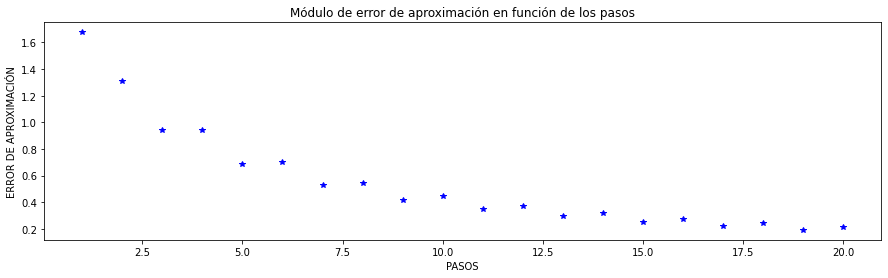

<Figure size 1440x288 with 0 Axes>

In [8]:
graficarErrorPorPaso(N,erroresMetDesc)

### 3)

In [9]:
def GramSchmidtModificado(d,v,A):
    u = v.copy()
    
    vt = np.transpose(v)
    i = 0
    while i<len(d):
        uold = u.copy()
        di = d[i]
        dit = np.transpose(di)
        u = uold - ((vt@A@di) / (dit@A@di))*di
        i=i+1
    
    return u

### 4)

In [10]:
def gradienteConjugado(A,b,n,x0=[]):
    d = []
    
    if len(x0) == 0:        # Si no se ingresa un vector inicial, le damos un vector inicial aleatorio  
        x0 = np.random.random(A.shape[0])
    
    errores = []
    
    x = x0.copy()
    i=0
    while i<n:
        xold = x.copy()
        ri = b-A@xold
        ri_ort = GramSchmidtModificado(d,ri,A)
        
        ri_ort_t = np.transpose(ri_ort)
        lamb_i = (ri_ort_t@ri) / (ri_ort_t@A@ri_ort)
        x = xold + lamb_i*ri_ort
        
        d.append(ri_ort)
        
        error = np.linalg.norm(b-A@x,2)
        errores.append(error)
        
        i=i+1
    
    return x,errores

### 5)

In [11]:
xGradConj, erroresGradConj = gradienteConjugado(A,b,N,x0)

In [12]:
xGradConj

array([-0.10775722,  0.38945105,  0.07213329,  0.1221483 ,  0.21136593,
       -0.632892  ,  0.24235918,  0.10505616, -0.10378974,  0.31650433])

In [13]:
erroresGradConj

[1.6769462703735123,
 0.8564245732950283,
 0.17444268072668864,
 0.0469003170457304,
 0.0062350154189836715,
 0.0011893267354600797,
 1.0651789378973523e-05,
 1.5190938909284776e-06,
 6.478745852811218e-08,
 1.1157603309187458e-15,
 1.4602703977091186e-15,
 1.0235750533041806e-15,
 9.805224261780596e-16,
 9.28879225241625e-16,
 1.2060109012779447e-15,
 1.2060109012779447e-15,
 1.2060109012779447e-15,
 1.2060109012779447e-15,
 1.2060109012779447e-15,
 1.2060109012779447e-15]

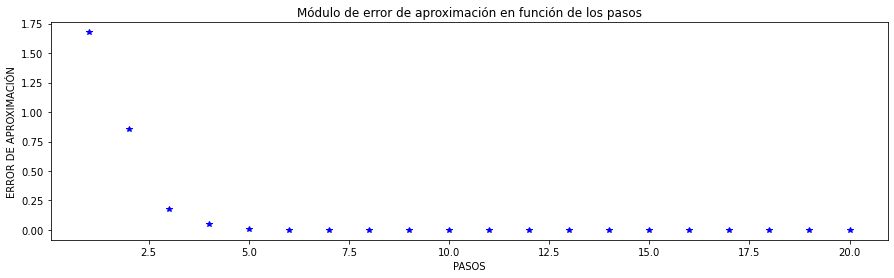

<Figure size 1440x288 with 0 Axes>

In [14]:
graficarErrorPorPaso(N,erroresGradConj)

En base a los resultados obtenidos de las pruebas ejecutadas, se puede decir que el método del gradiente conjugado es mejor para resolver sistemas de ecuaciones lineales puesto que converge más rápidamente a una solución más cercana a la solución real comparado con el método del descenso. Esto se puede ver fácilmente viendo que el error en las soluciones obtenidas en cada iteración del método del gradiente conjugado tiende más rápidamente a cero que en el método del descenso (es decir, encuentra un $x$ tal que el $∥b − Ax_{(k)}∥_2$ tiende a cero más rápido).  
De esta manera, podemos encontrar una solución más cercana a la real en menos iteraciones usando el método del gradiente conjugado, aunque para saber si es computacionalmente menos costoso deberíamos calcular la complejidad de ambos algoritmos.